In [8]:
%%capture
%run part_06_visualization.ipynb
from sklearn.datasets import load_digits

# **Some Utility Functions**

In [2]:
def one_hot_encode(label):
    return [1.0 if i == label else 0.0 for i in range(10)]

def one_hot_decode(one_hot):
    return one_hot.index(max(one_hot))

def display_digit(sample):
    image_format = [sample[i:i+8] for i in range(0, len(sample), 8)]
    plt.figure(figsize=(3, 3))
    plt.imshow(image_format, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.show()

# **Load and Prep the Data**

In [3]:
digits = load_digits()
features = digits.data.tolist()
targets = [one_hot_encode(target) for target in digits.target.tolist()]
data = [[f, t] for f, t in zip(features, targets)]
split_idx = int(len(features) * 0.8)
training_data, validation_data = data[:split_idx], data[split_idx:]

# **Explore and Visaulize the Data**

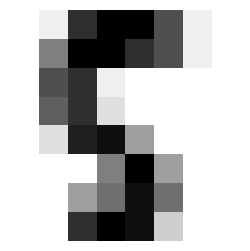


Label: 5
Target: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Raw Feature Data:
[0.0, 1.0, 13.0, 16.0, 16.0, 11.0, 1.0, 0.0, 0.0, 8.0, 16.0, 16.0, 13.0, 11.0, 1.0, 0.0, 0.0, 11.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 13.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 14.0, 15.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 9.0, 15.0, 9.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 15.0, 3.0, 0.0, 0.0]


In [4]:
i = random.randint(0, len(data)-1)
display_digit(data[i][0])
print(f'\nLabel: {one_hot_decode(data[i][1])}')
print(f'Target: {data[i][1]}')
print(f'Raw Feature Data:\n{data[i][0]}')

# **Train and Evaluate**

In [5]:
shape = [64, 10, 10, 10, 10]
model = construct_model(shape)

In [6]:
print(f'MSE before training: {evaluate_error(model, validation_data)}')
print(f'Accuracy before training: {evaluate_accuracy(model, validation_data)}')
train_model(model, training_data, 100, 0.01)
print(f'MSE after training: {evaluate_error(model, validation_data)}')
print(f'Accuracy after training: {evaluate_accuracy(model, validation_data)}')

MSE before training: 0.09405186780783154
Accuracy before training: 0.05555555555555555
Progress: [██████████████████████████████████████████████████] 100%
MSE after training: 0.014508484951320086
Accuracy after training: 0.9166666666666666


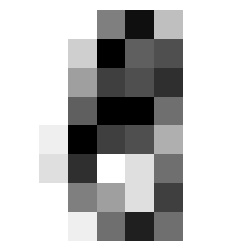


Label: 8
Prediction: 8
Target: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
Output: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9921276024678541, 0.0]


In [7]:
i = random.randint(0, len(validation_data)-1)
output = forward(model, validation_data[i][0])
display_digit(validation_data[i][0])
print(f'\nLabel: {one_hot_decode(validation_data[i][1])}')
print(f'Prediction: {one_hot_decode(output)}')
print(f'Target: {validation_data[i][1]}')
print(f'Output: {output}')